# Problem Statement
### Context: 
The data contains medical costs of people characterized by certain attributes. Let’s see if
we can dive deep into this data to find some valuable insights.

## Attributes
*age* : age of primary beneficiary

*sex* : insurance contractor gender, female, male
*bmi* : Body mass index, providing an understanding of body, weights that are relatively high or low
relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight,
ideally 18.5 to 24.9

*children* : Number of children covered by health insurance / Number of dependents

*smoker* : Smoking

*region* : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*charges* : Individual medical costs billed by health insurance.

In [1]:
# 1. Inserting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()
%matplotlib inline

In [2]:
# 2. Read the data as dataframe
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 3. Basic EDA
# a. Shape of the data
df.shape

(1338, 7)

In [4]:
# b. data type of each attribute
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# c. checking the presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
# d. 5 point summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


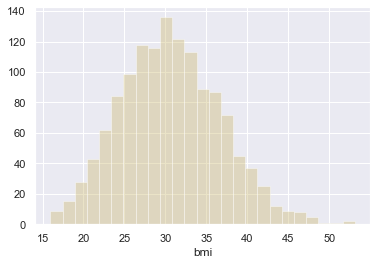

In [7]:
# e. Distribution bmi, age and charges column
sns.distplot(df['bmi'], color='y', kde=False)

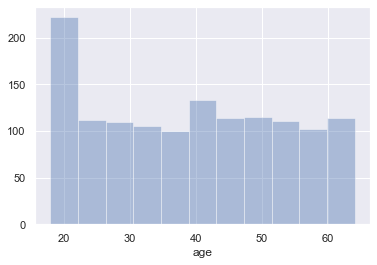

In [8]:
sns.distplot(df['age'], color='b', kde=False)

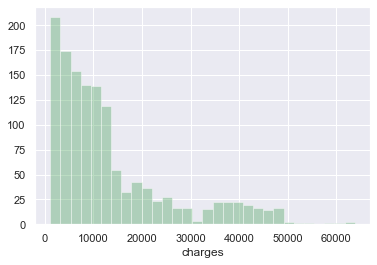

In [9]:
sns.distplot(df['charges'], color='g', kde=False)

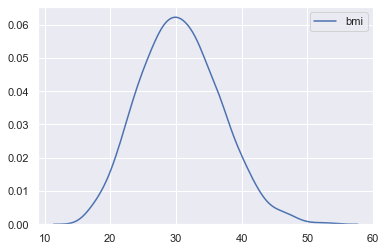

In [10]:
# f. measure skewness 
sns.kdeplot(df['bmi'])

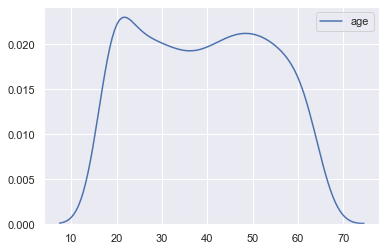

In [11]:
sns.kdeplot(df['age'])

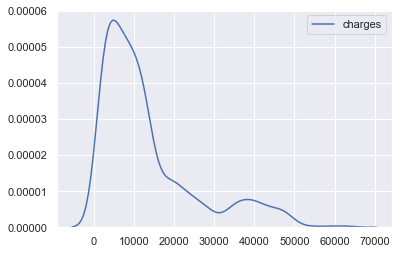

In [12]:
sns.kdeplot(df['charges'])

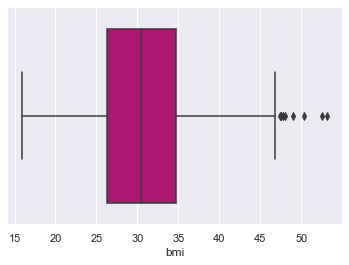

In [13]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.boxplot(df['bmi'], color='xkcd:magenta')

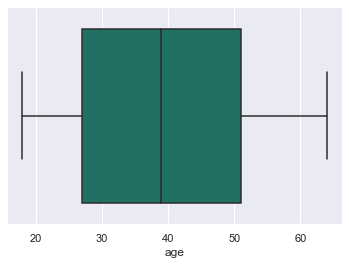

In [14]:
sns.boxplot(df['age'], color='xkcd:blue green')

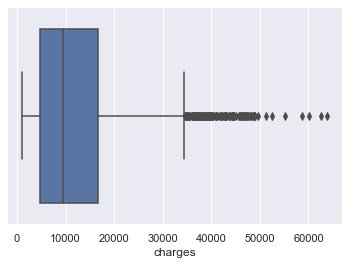

In [15]:
sns.boxplot(df['charges'])

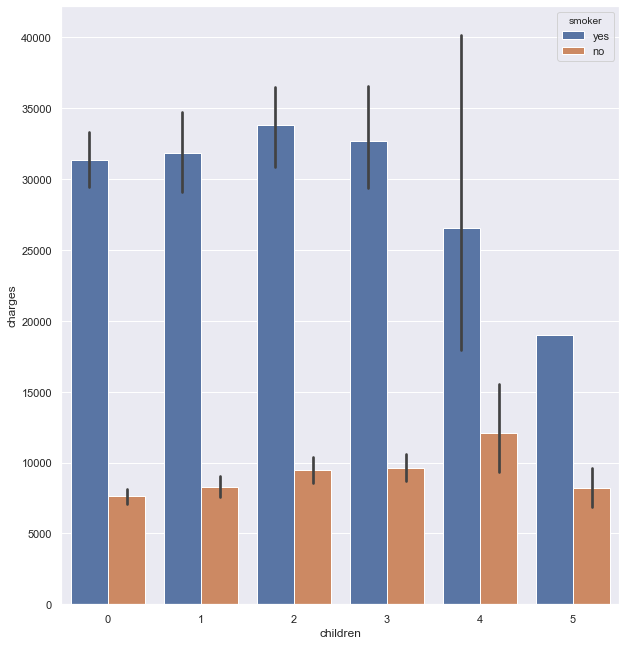

In [16]:
# h. Distribution of categorical columns (include children)
fig,ax = plt.subplots(figsize=(10,11))
sns.barplot(x = 'children', y='charges', data=df, hue='smoker')

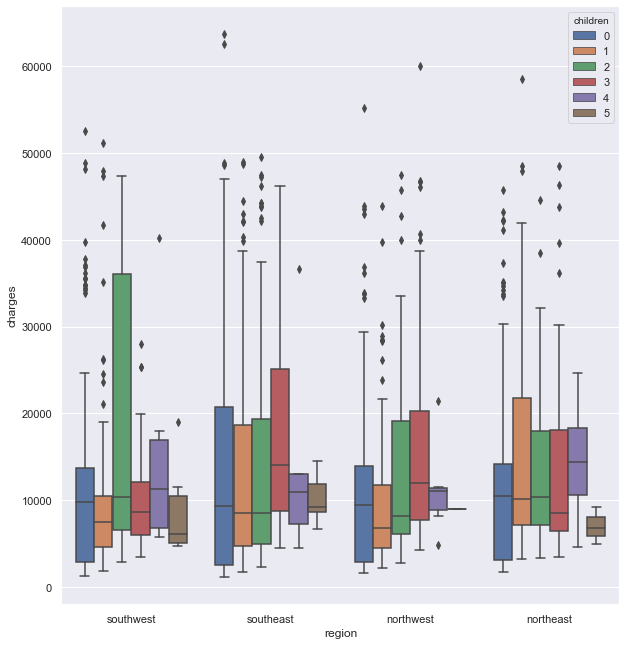

In [17]:
fig,ax = plt.subplots(figsize=(10,11))
sns.boxplot(x='region', y='charges', data=df, hue='children')

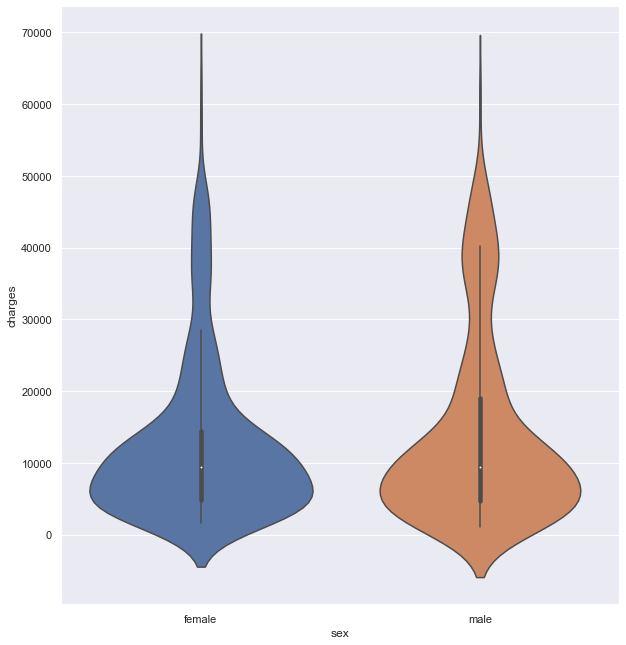

In [18]:
fig,ax = plt.subplots(figsize=(10,11))
sns.violinplot(x='sex', y='charges', data=df)

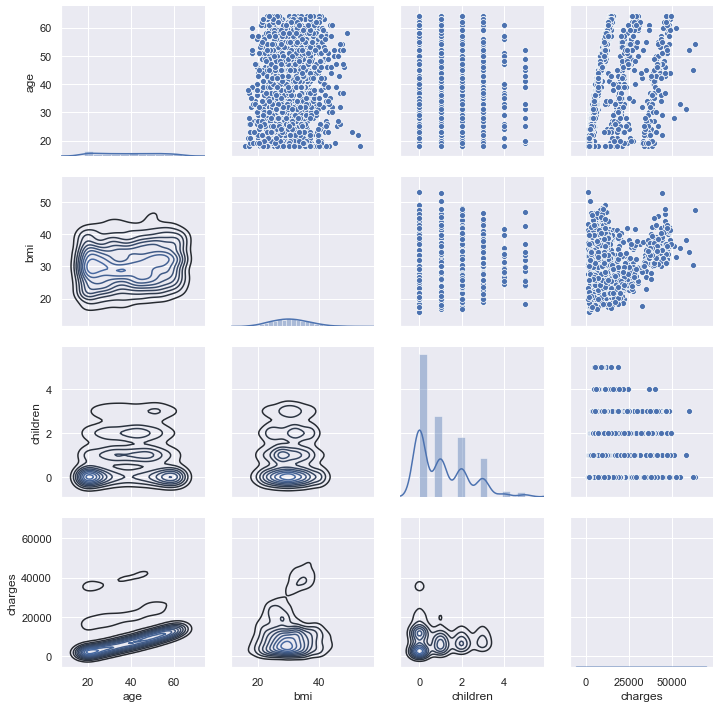

In [19]:
# i. Pair plot that includes all the columns of the data frame 
g = sns.PairGrid(df)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

In [5]:
columns = df.columns
le = LabelEncoder()
for col in columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

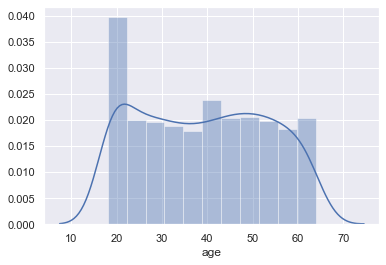

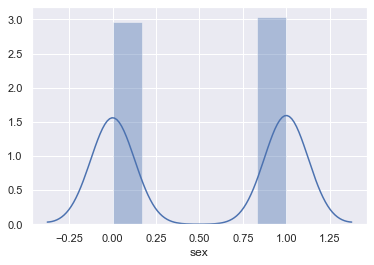

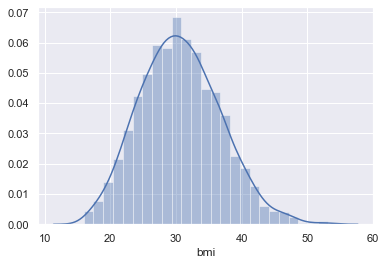

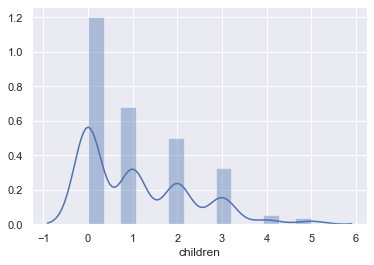

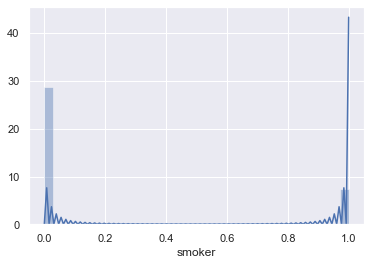

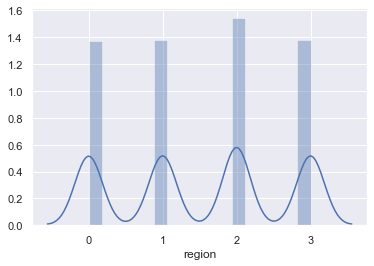

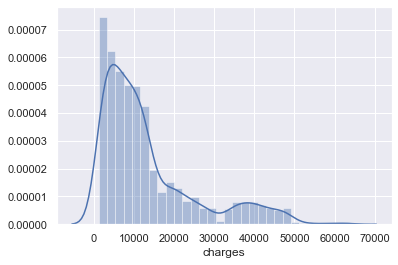

In [21]:
for col in columns:
    sns.distplot(df[col])
    plt.show()

## Statistical Evidence

#### a. Do charges of people who smoke differ significantly from the people who don't?

In [13]:
# a. Do charges of people who smoke differ significantly from the people who don't?
smokers = df[df['smoker'] == 1]
non_smoker = df[df['smoker'] == 0]

In [14]:
# H0: The mean charges is same for both smokers and non smokers
# H1: The mean charges are different for smokers and non smokers

In [15]:
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn import preprocessing
# This is unpaired testing. We have data from 2 samples
t_statistics, p_value = ttest_ind( np.log(smokers['charges']), np.log(non_smoker['charges']))
if p_value > 0.05:
    print("Fail to reject H0: The mean charges is same for both smokers and non smokers")
else:
    print("Reject H0")

Reject H0


In [37]:
# Using mannwhitneyu: 
t_statistics, p_value = mannwhitneyu(smokers['charges'], non_smoker['charges'])
if p_value > 0.05:
    print("Fail to reject H0: The mean charges is same for both smokers and non smokers")
else:
    print("Reject H0")

Reject H0


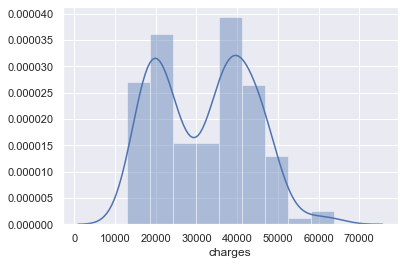

In [52]:
sns.distplot(smokers['charges'])

#### b.  Does bmi of males differ significantly from that of females?

In [18]:
# H0: BMI of male and females are same
# H1: BMI of male and females are different
male = df[df['sex'] == 1]
female = df[df['sex'] == 0]

In [19]:
t_statistics, p_value = ttest_ind(male['bmi'], female['bmi'])
if p_value > 0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')

Fail to reject H0


#### c. Is the proportion of smokers significantly different in different genders?

In [20]:
# H0: Proportion of smokers are same in both genders
# H1: Proportion of genders are different in both genders

from scipy.stats import chi2_contingency


In [22]:
crosstab = pd.crosstab(df['sex'], df['smoker'])
crosstab

smoker,0,1
sex,,
0,547,115
1,517,159


In [24]:
t_stat, p_value, dof, expected = chi2_contingency(crosstab)

In [25]:
if p_value > 0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')

Reject H0


#### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [49]:
# H0: The average is same across the 3 groups
# H1: The average is not same across the 3 groups

from scipy.stats import f_oneway as anova

In [50]:
women_no_child = female[female['children'] == 0]
women_one_child = female[female['children'] == 1]
women_two_children = female[female['children'] == 2]

In [51]:
stat, p_value = anova(women_no_child['bmi'], women_one_child['bmi'], women_two_children['bmi'])
if p_value > 0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')

Fail to reject H0
